## *Задача 1* 


Реализовать с помощью scipy генератор полосатых матриц, который должен поддерживать функции:
* Генерация абсолютно случайной полосатой матрицы $n\times m$
* Генерация полосатой матрицы с постоянными коэффициентами вдоль каждой полосы $n\times n$
* Генерация случайного возмущения матрицы $n\times m$, каждый элемент которой не превосходит по модулю заданный $\varepsilon$
* Генерация полосатой матрицы, в которой полосы заданы векторами.

 Сравнить три приведённых ниже метода создания матриц между собой по использованию памяти, используя измерение размера объектов в Python (sys.getsizeof(object[, default])). 
 Реализовать генератор матриц всеми тремя методами, сравнить их также по скорости (для решения систем уравнений).




In [ ]:
import sys as ss
import scipy
import numpy as np
N = 10
m = 3
Ap, As, An, Aw, Ae = np.ones(N), np.ones(N), np.ones(N), np.ones(N), np.ones(N)
diagonals = [Ap, As, An, Aw, Ae]
A = scipy.sparse.diags(diagonals, [0, -1, 1, -m, m]).toarray()
x = scipy.linalg.solve(A, b)
print(A, x, sep = '\n')


In [ ]:
import sys as ss
import scipy
import numpy as np
N = 10 
m = 3
Ap, As, An, Aw, Ae = np.ones(N), np.ones(N), np.ones(N), np.ones(N), np.ones(N)
A = np.zeros((2 * m + 1, N))
A[0] = Ae
A[m - 1] = An
A[m] = Ap
A[m + 1] = As
A[2 * m] = Aw
x = scipy.linalg.solve_banded((m, m), A, b)
print(A, x, sep = '\n')

In [ ]:
import sys as ss
import scipy
import numpy as np
from scipy.sparse.linalg import spsolve
N = 10
m = 3
Ap, As, An, Aw, Ae = np.ones(N), np.ones(N), np.ones(N), np.ones(N), np.ones(N)
diagonals = [Ap, As, An, Aw, Ae]
A = scipy.sparse.diags(diagonals, [0, -1, 1, -m, m])
x = spsolve(A,b)

# убрали .toarray() - чтобы сохранить разреженную форму

# https://docs.scipy.org/doc/scipy/reference/sparse.linalg.html#module-scipy.sparse.linalg 

print(A, x, sep = '\n')


# Задача 2


В третьем методе из предыдущей задачи для повышения производительности можно использовать sparse.linalg.splu(A).solve(b) , который использует LU-декомпозицию, после чего объект SuperLU  имеет свой собственный метод solve.

Реализуйте генератор матриц из первого задания, используя этот метод. 
https://docs.scipy.org/doc/scipy/reference/sparse.linalg.html#module-scipy.sparse.linalg   

Убедитесь измерением времени работы, что он работает быстрее. Однако третий метод из предыдущей задачи считается самым предпочтительным. Найдите, в чём недостаток предложенного в этой задаче метода, и докажите его с помощью измерений.

Для измерений можно использовать 

https://docs.python.org/3/library/resource.html#resource-usage  

# Задача 3

После первой стадии метода вращений Гивенса система имеет вид 

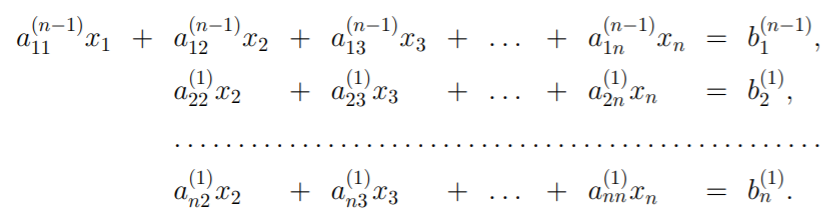 


Доказать следующие формулы:

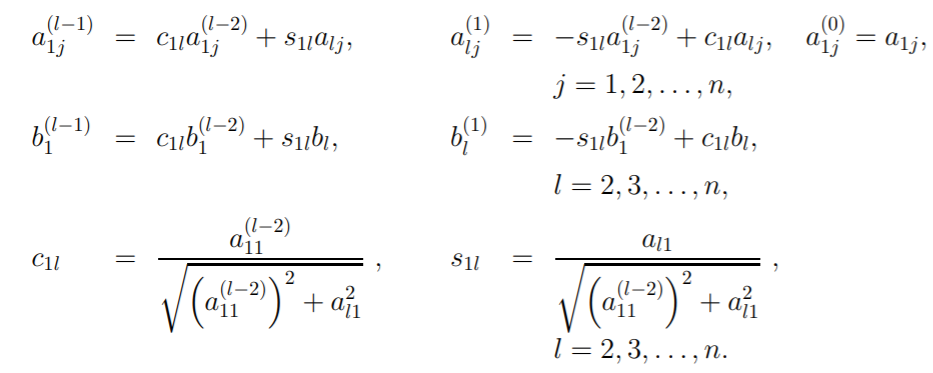  

После второй стадии метода вращения Гивенса система уравнений имеет вид: 
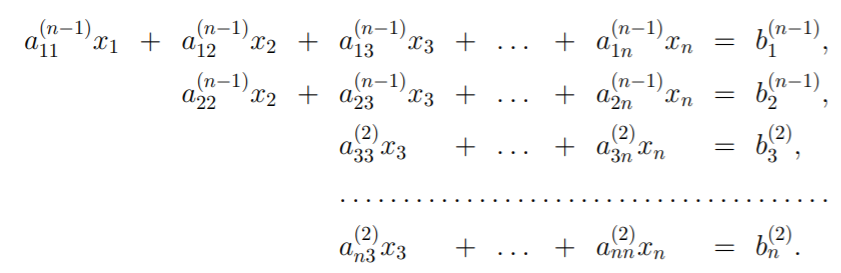   


Доказать следующие формулы 
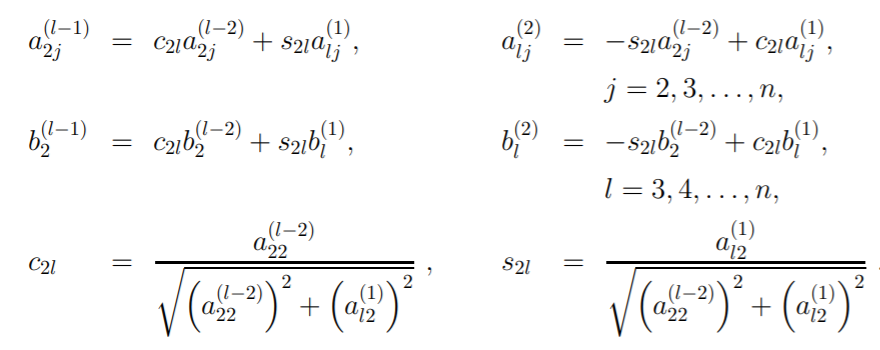  


После (n-1) шагов метода Гивенса получаем систему:

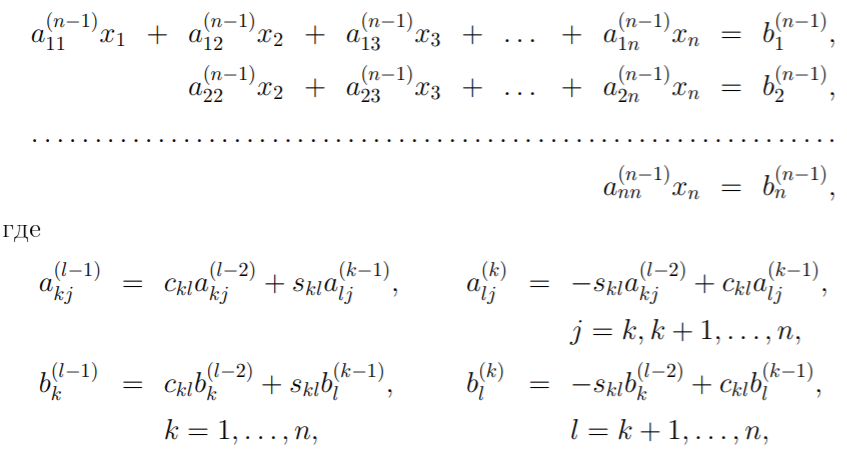  

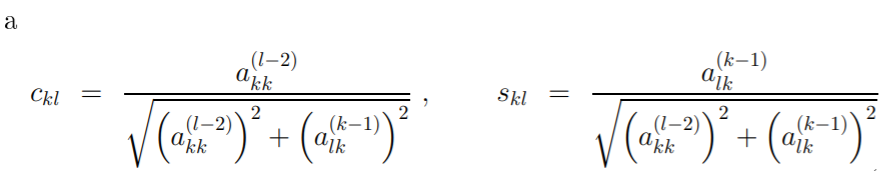  


Доказать, что метод Гивенса реализует QR-разложение матрицы.



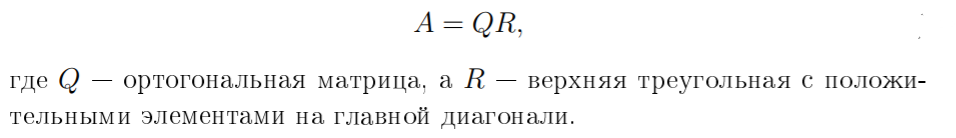 

# Задача 4

Покажите, что при больших n метод Гивенса требует

  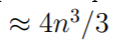  
  
  действий умножения.  Докажите, что метод Гаусса требует примерно в 4 раза меньше.  

Примените и тот, и другой метод для решения систем уравнений, используя библиотечные функции, и продемонстрируйте эту разницу измерением времени работы.

.


# Задача 5

Реализовать итерационный метод Гаусса решения СЛАУ и метод простой итерации. Использовать данные методы для решения систем различных размеров. Оценить скорость работы методов (необходимое количество операций на одну итерацию) в зависимости от размера системы. 

.

# Задача 6

Если использовать метод простых итераций для симметричной положительно определённой матрицы, то верна теорема

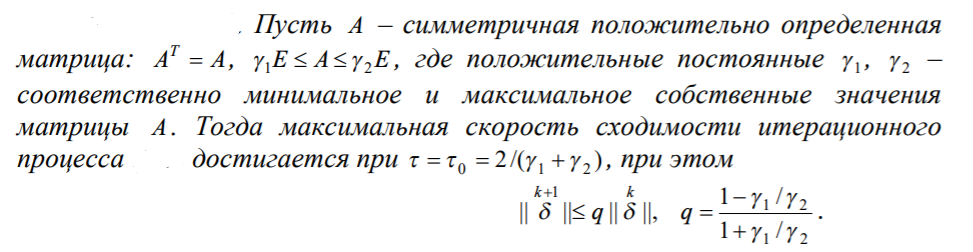  


Ответьте на вопрос - при каких значениях параметра метода простой итерации он сходится? Напишите генератор случайных симметричных положительно определённых матриц и программу, которая проверяет данное утверждение, выбирая несколько значений параметра МПИ, лежащих в том диапазоне, в котором этот метод сходится.

Проверка предусматривает вычисление скорости сходимости итерационного процесса путём сравнения невязок между собой. 

